rBergomi: obtaining surface
==

$$S_t = \mathcal{E} \left\{ \int_0^t \sqrt{ V_u } \ \mathrm{d} \ (\rho W^1_u + \bar{\rho} W^2_u) \right\}, \quad V_t = \xi \ \mathcal{E} \left\{ \eta \sqrt{2\alpha + 1} \int_0^t (t - u)^\alpha \mathrm{d}W^1_u \right\},$$

In [1]:
import os
os.chdir('/Users/ryanmccrickerd/desktop/rbergomi/rbergomi')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from rbergomi import rBergomi
from surface import Surface
from routines import *
% matplotlib inline

Set antithetic sampling here

In [3]:
rbergomi = rBergomi(n = 168, N = 100000, T = 5./312, a = -0.43, AS = True)

In [4]:
tenor = '5D'
surface = Surface(tenor, 'rbergomi', close = False)
surface.surface

,5P,10P,15P,20P,25P,30P,35P,40P,45P,ATM,45C,40C,35C,30C,25C,20C,15C,10C,5C
5D,0.326332,0.296127,0.27759,0.263757,0.252531,0.24311,0.234933,0.227548,0.22074,0.215006,0.208198,0.20233,0.196613,0.190928,0.185162,0.179191,0.172912,0.165978,0.157396


In [5]:
kwargs = {'xi':0.235**2, 'eta':1.9, 'rho':-0.9}

Select implied vol construction here

In [6]:
method = base_run
# method = moment_matching
# method = conditional_mc
# method = price_control
# method = timer_control
# method = optimal_run

In [7]:
np.random.seed(0)

In [8]:
IV = method(rbergomi, surface, **kwargs)

This will write to file.

In [ ]:
# import xlwings as xw

# install_path = '/Users/ryanmccrickerd/desktop'
# file_path = install_path + '/rbergomi/data/rBergomi_' + tenor + '.xlsx'

# # Instantiate xlwings object
# wb = xw.Book(file_path)
# sht = wb.sheets['Sheet1']

# # Paste implied vols
# sht.range('B6').value = 100 * np.flipud(np.transpose(IV))
# wb.save()

This section should take the same amount of time for each. N should be scaled accordingly.

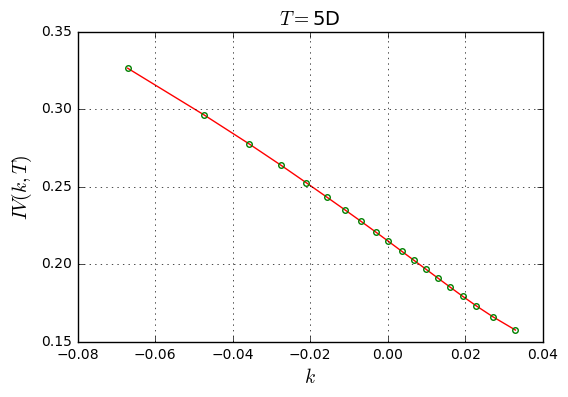

In [9]:
k = np.array(surface._log_strike_surface())
MV = np.array(surface.surface)

for M in range(len(k[:,0])):
    plot, axes = plt.subplots()

    axes.plot(k[M,:], IV[M,:], 'r')
    
    # 1SD bounds - only correct when not using AV
    # axes.plot(k[M,:], IV[M,:,0], 'k--', linewidth = 0.5) # Lower bound
    # axes.plot(k[M,:], IV[M,:,2], 'k--', linewidth = 0.5) # Upper bound

    axes.plot(k[M,:], MV[M,:], 'go', fillstyle = 'none', ms = 4, mew = 1)
    
    axes.set_xlabel(r'$k$', fontsize = 14)
    axes.set_ylabel(r'$IV(k,T)$', fontsize = 14)
    axes.set_title(r'$T=$' + surface._tenors[M], fontsize = 14)
    #axes.legend([r'$\mathsf{Standard}$', r'$\mathsf{Timer \ Control}$', r'$\mathsf{S \ Control}$'])
    # plt.xlim([-0.05,0.05])
    # plt.ylim([0.14,0.30])
    
    plt.grid(True)